# Selecting the right Architecture for your NN
Previously we learned how to set up a basic NN and run an OLS regression. In step 2, we looked at a more complex data generating process with non-linearities. Based on our econometrics knowledge, we know that OLS is not doing very well there.

Now, we want to think about the Architecture of a NN as we have to decide how many hidden layers to use and how many nodes each layer should have.

Note: This notebook summarizes what has been written in other blogs ([Stackexchange](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw), [medium](https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3), [medium](https://medium.com/@souvik.paul01/pruning-in-deep-learning-models-1067a19acd89))

## Input Layer
- Only one layer is needed!
- Nodes: Number of columns in your training data (+1 if you want to include bias)

## Output Layer
- Only one layer is needed!
- Nodes: If it is a `regressor` only one node; if it is a `classifier` only one node (except if it uses softmax for which it depends on the number of class labels)

## Hidden Layer(s)
This is were the fun begins. There is a ton of practical advise such as:

>In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.
[Stackexchange](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

>There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
> - The number of hidden neurons should be between the size of the input layer and the size of the output layer.
> - The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
> - The number of hidden neurons should be less than twice the size of the input layer.
[medium](https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3)

## Pruning
Once we have created a model, we want to `prune` eg make it more parsimonious. This looks very similar to what we do with regression models. The classic problems are the fear of overfitting and also speed advantages.

In practice, we can use different pruning algorithms to detect nodes which are not very useful (think of dropping insignificant regresssors from your OLS model). One idea is to look at the weights of each node. If they are close to 0, the node might not be very useful. BUT, we do not have to do it by hand as there are algorithms which can do it for you.

## Example 
We can only really understand these tips when we try it out ourselves. I generated a very weird looking data generating process which creates a Y and multiple regressors X. 

In [1]:
from utilities import dgp_nonlinear

In [10]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Generating your data:
N = 100000
N_training = int(N*0.8)
N_validation = int(N*0.2)
training_data = dgp_nonlinear(N_training)
validation_data = dgp_nonlinear(N_validation)

In [8]:
### Time to play
training_data

,Y,X1,X2,X3
0,2.739703,0.279149,-1.095075,-0.203322
1,-2.805543,0.430736,0.877306,0.135348
2,3.533813,1.265597,-1.850723,-1.041540
3,2.171076,0.147923,-0.820581,-0.045544
4,0.137662,0.037727,-0.071108,-0.052116
...,...,...,...,...
79995,-1.579106,0.889646,0.346970,0.423833
79996,1.617314,0.680321,-0.918511,-0.681343
79997,-2.897587,0.590491,0.886476,0.300449
79998,1.943157,1.516210,-1.468630,-1.564288


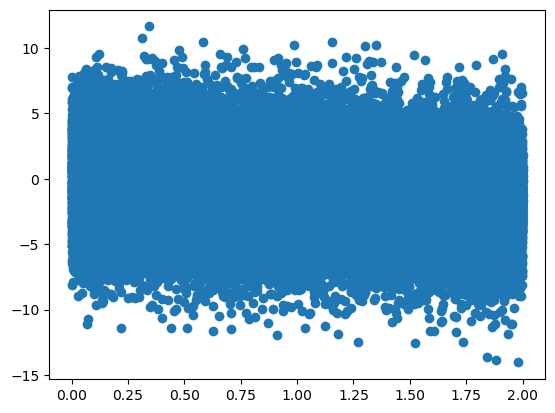

In [12]:
plt.plot(training_data['X1'], training_data['Y'], 'o')

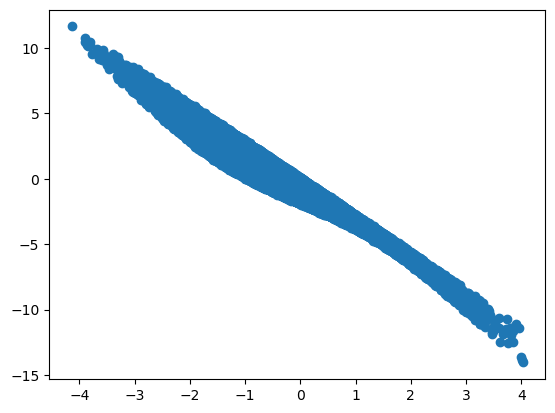

In [13]:
plt.plot(training_data['X2'], training_data['Y'], 'o')

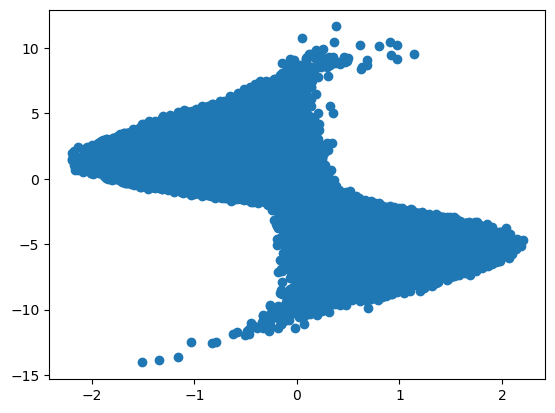

In [14]:
plt.plot(training_data['X3'], training_data['Y'], 'o')